In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X=df.iloc[:,2:-1]
y=df["Exited"]

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le_gen=LabelEncoder()
le_geo=LabelEncoder()
X_train["Geography"]=le_geo.fit_transform(X_train["Geography"])
X_test["Geography"]=le_geo.transform(X_test["Geography"])
X_train["Gender"]=le_gen.fit_transform(X_train["Gender"])
X_test["Gender"]=le_gen.transform(X_test["Gender"])


In [6]:
std=StandardScaler()
X_train_scaled=std.fit_transform(X_train)
X_test_scaled=std.transform(X_test)

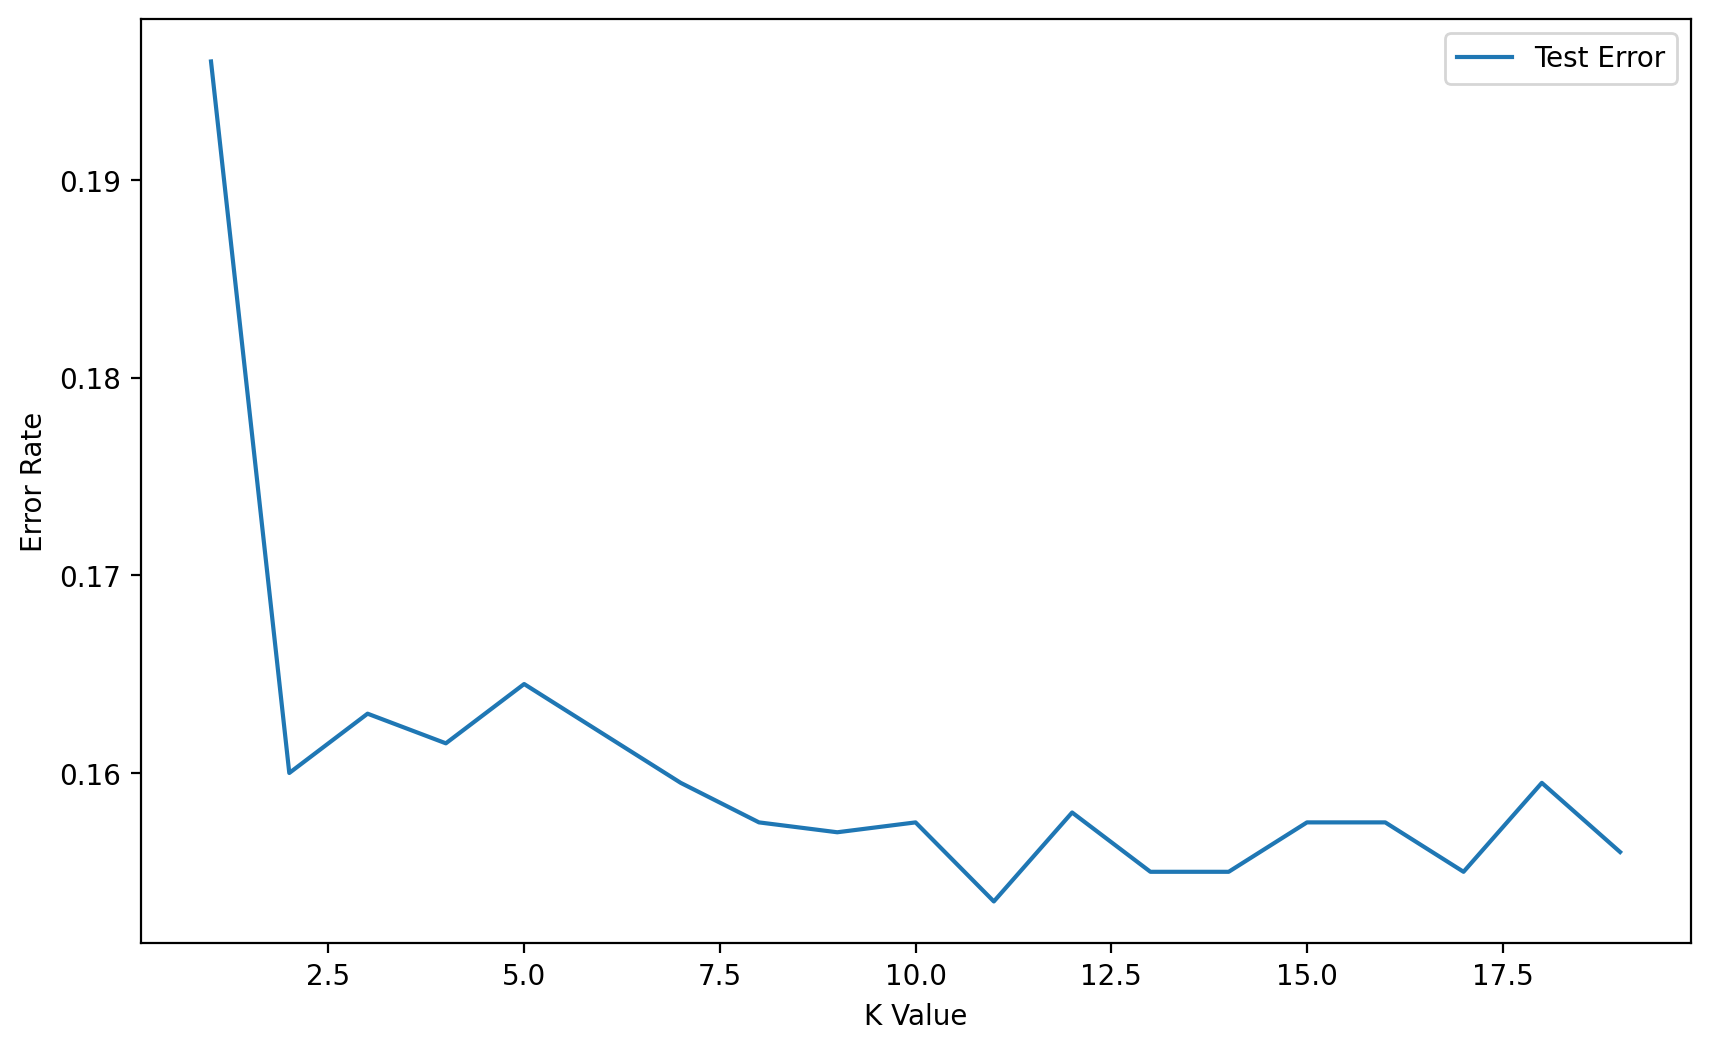

In [7]:
from sklearn.metrics import accuracy_score as ac
from sklearn.neighbors import KNeighborsClassifier
test_error_rates=[]
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train)
    y_test_pred=knn_model.predict(X_test_scaled)
    test_error=1-ac(y_test,y_test_pred)
    test_error_rates.append(test_error)
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label="Test Error")
plt.legend()
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()    

#### Pick 11 as the optimized K

In [8]:
knn_10=KNeighborsClassifier(n_neighbors=11)
knn_10.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=11)

The training score is 0.85575. The test score is 0.8465.
The confusion matrix is 
[[1548   59]
 [ 248  145]].
The classification report is 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.71      0.37      0.49       393

    accuracy                           0.85      2000
   macro avg       0.79      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



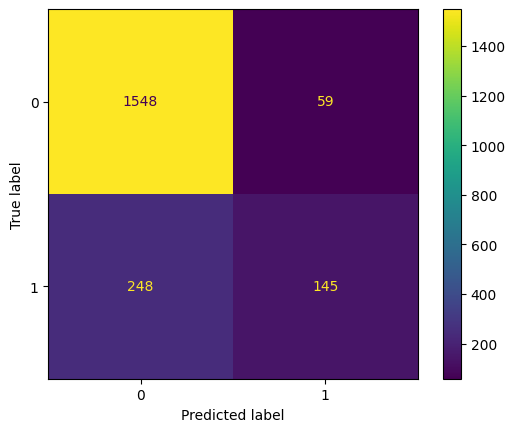

In [9]:
y_test_pred=knn_10.predict(X_test_scaled)
y_train_pred=knn_10.predict(X_train_scaled)
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm, classification_report as report, ConfusionMatrixDisplay as display
train_scores=ac(y_train,y_train_pred)
test_scores=ac(y_test,y_test_pred)
c_matrix=cm(y_test,y_test_pred)
c_report=report(y_test,y_test_pred)
print(f"The training score is {train_scores}. The test score is {test_scores}.")
print(f"The confusion matrix is \n{c_matrix}.")
print(f"The classification report is \n{c_report}")
disp=display(confusion_matrix=c_matrix,display_labels=knn_10.classes_)
disp.plot()
plt.show()

#### Precision-Recall Curve

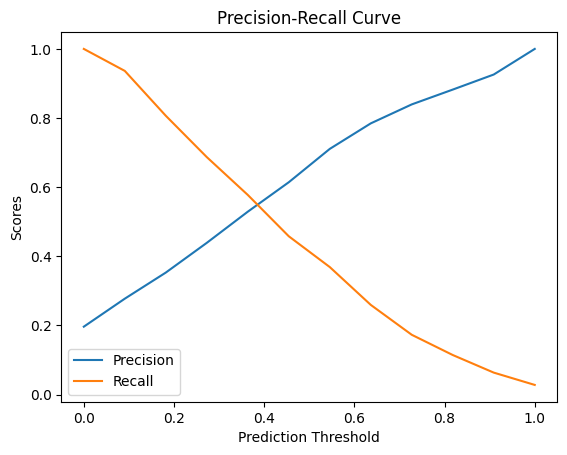

In [10]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p_curve,r_curve,t_curve,=precision_recall_curve(y_test,knn_10.predict_proba(X_test_scaled)[:,1])
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

#### The precision and recall are at each other's expenses. It's not possible to have a point where the model can enjoy both high precision and recall rate.

#### ROC Curve 

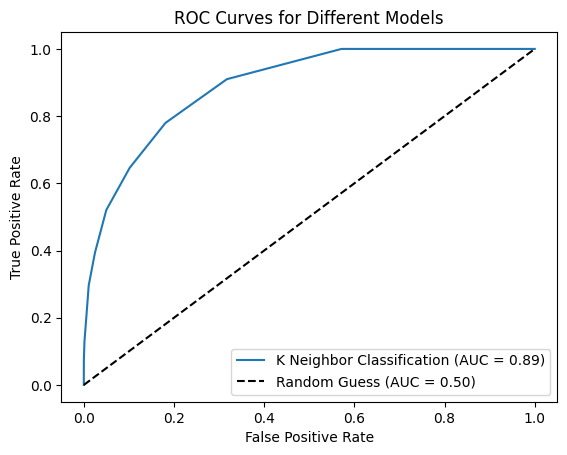

In [11]:
from sklearn.metrics import roc_curve,auc
y_probs=knn_10.predict_proba(X_train_scaled)[:,1]
fpr,tpr,threasholds=roc_curve(y_train,y_probs)
auc_score=auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'K Neighbor Classification (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()


#### The area under curve is 89%. It means the model have an accuracy of 89% of correctly classifying a given case all in all. 

## The End